# PCA using Linear Algebra (Eigen Decomposition)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer=load_breast_cancer()

In [5]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# step 1:  Scale the data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
x_std = StandardScaler().fit_transform(df)


In [9]:
x_std.shape

(569, 30)

# step 2: Compute covariance matrix of data matrix --> N x N matrix --> where N = feature vector Dimension

In [10]:
covariance_matrix = np.cov(x_std.T)
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.

In [11]:
covariance_matrix.shape

(30, 30)

# step 3:  Eigen Dicomposition 

In [12]:
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

In [13]:
eigen_values

array([1.33279057e-04, 7.50121413e-04, 1.59213600e-03, 6.91261258e-03,
       8.19203712e-03, 1.55085271e-02, 1.80867940e-02, 2.43836914e-02,
       2.74877113e-02, 3.00256631e-02, 3.12142606e-02, 4.95647002e-02,
       5.27114222e-02, 5.95036135e-02, 8.00034045e-02, 9.43006956e-02,
       1.57286149e-01, 2.41782421e-01, 2.61621161e-01, 2.94433153e-01,
       3.51310875e-01, 4.17628782e-01, 4.77456255e-01, 6.76408882e-01,
       1.20948224e+00, 1.65163324e+00, 1.98412752e+00, 2.82291016e+00,
       5.70137460e+00, 1.33049908e+01])

In [14]:
eigen_vectors.shape

(30, 30)

# step 4:  Sort the eigen values to arrange the PC components as per their variance ratio

In [15]:
idx = np.argsort(eigen_values)[::-1]
eigen_vectors = eigen_vectors[:,idx]
eigen_values = eigen_values[idx]


In [16]:
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

# Step 5: Project the data on the PCs

In [17]:
x_std.shape

(569, 30)

In [18]:
pc=eigen_vectors.T[0:2]

In [19]:
pc

array([[-0.21890244, -0.10372458, -0.22753729, -0.22099499, -0.14258969,
        -0.23928535, -0.25840048, -0.26085376, -0.13816696, -0.06436335,
        -0.20597878, -0.01742803, -0.21132592, -0.20286964, -0.01453145,
        -0.17039345, -0.15358979, -0.1834174 , -0.04249842, -0.10256832,
        -0.22799663, -0.10446933, -0.23663968, -0.22487053, -0.12795256,
        -0.21009588, -0.22876753, -0.25088597, -0.12290456, -0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [20]:
pc.shape

(2, 30)

In [21]:
transformed_data = np.matmul(x_std,eigen_vectors)

In [22]:
transformed_data

array([[-9.19283683e+00,  1.94858307e+00,  1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [-2.38780180e+00, -3.76817174e+00,  5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [-5.73389628e+00, -1.07517380e+00,  5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [-1.25617928e+00, -1.90229671e+00, -5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [-1.03747941e+01,  1.67201011e+00,  1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [ 5.47524330e+00, -6.70636791e-01, -1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [23]:
transformed_data.shape 

(569, 30)

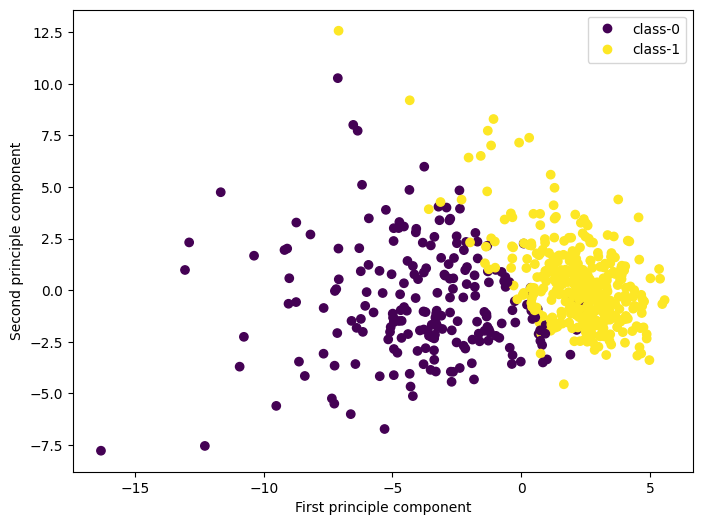

In [30]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(transformed_data[:,0],transformed_data[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend(handles=scatter.legend_elements()[0], labels=['class-0','class-1'])

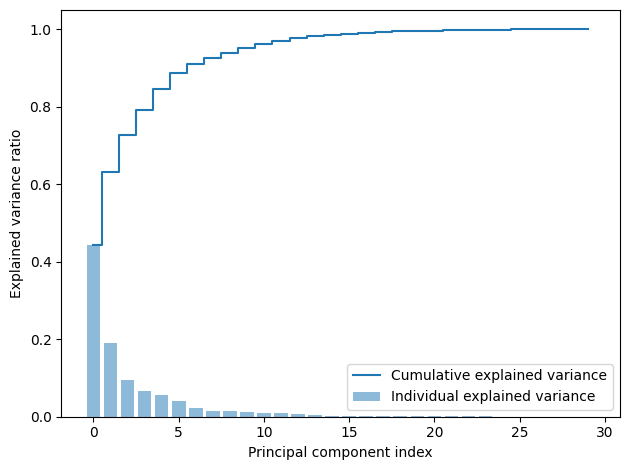

In [25]:
# Determine explained variance
total_eigenvalues = sum(eigen_values)
var_exp = [(i/total_eigenvalues) for i in sorted(eigen_values, reverse=True)]
# Plot the explained variance against cumulative explained variance

import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()